# Astropy

Astropy contains tons of useful tools for astronomy and astrophysics.

Some of the things that can accomplished through astropy are:

* Visualizing astronomical images stored in FITS files (FITS files are a common file format in astronomy).
* Handling data stored in FITS tables.
* Using different coordinate systems.
* Defining and converting between arithmetic and physical quantities.
* Fitting models to data.

To install astropy, run the following in the terminal:

* conda install --name nsbp-2022 astropy

* conda activate nsbp-2022

### Working with units

astropy.units handles defining, converting between, and performing arithmetic with physical quantities, such as meters, seconds, Hz, etc. It also handles logarithmic units such as magnitude and decibel.
This subpackage allows you to attach units to scalars and arrays. These quantities can be manipulated or combined, while keeping track of the units.
First, let's import the right subpackage:

In [6]:
import astropy.units as u
import numpy as np

If you wanted to load the unit meters, you would do the following:

In [8]:
u.m

Unit("m")

#### Exercise

See this link for a list of all available units in astropy: https://docs.astropy.org/en/stable/units/index.html#module-astropy.units.si
Load the following units to this notebook:
* parsec

* Jansky

* Solar mass

* Astronomical unit (AU)

Run a quick wikipedia search to learn a little bit about these units.

In [9]:
### Your code goes here

You can also create composite units. For example:

In [11]:
u.m / u.kg / u.s**2

Unit("m / (kg s2)")

Moreover, you can attach a number to a unit to make a quantity.

In [12]:
3.7 * u.au  # Quantity object = 3.7 astronomical units

<Quantity 3.7 AU>

#### Exercise

* Create a quantity for 1.4 solar masses and saver it under the variable name *mass_star*
* Create a quantity for 0.001 Janskys and save it under the variable name *brightness*


In [15]:
### your code goes here

You can convert between units. For example, if you wanted to convert 3 solar masses to kilograms, you could run the following:

In [16]:
b=3 *u.solMass # original quantity & unit in solar masses
b.to(u.kg) #converting to kilograms

<Quantity 5.96522961e+30 kg>

#### Exercise

Make a quantity called dist_to_sun that is equal to 4.5 AU (astronomical units). Convert it to meters

In [17]:
### your code goes here

#### Exercise

Can you conver the quantity dist_to_sun to kilograms? Why or why not?

### Working with physical constants

The astropy.constants module contains physical constants relevant for astronomy. They are defined as Quantity objects using the astropy.units.



In [18]:
from astropy import constants as const

You can load constants like the speed of light, or Newton's gravitational constant, or Planck's constant. For a full list of all available constants, see: https://docs.astropy.org/en/stable/constants/index.html

In [20]:
const.G #Gravitational constant = number and units!


<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

#### Exercise

Load the following constants:

* Mass of the electron

* Stefan-Boltzmann constant

* Avogadro’s number

In [21]:
### your solution goes here

#### Exercise

Let's estimate the (circular) orbital speed of the Earth around the Sun using Kepler's Law:

$ v = \sqrt{\frac{G M_{\odot}}{r}}$ 

Use astropy and units constants to calculate this, save it under the variable name *v*:

Recall G is the gravitational constant, $M_{odot}$ is the solar mass and r is the average distance between the Sun and the earth, which is equal to 1 AU (Astronomical Unit).

In [23]:
## your code goes here

What are the unit of *v*? Whatever they are, you should be able to convert them to more standard valocity units, like meters/second.

#### Exercise

Convert *v* to units of meters per second.

In [24]:
## your code goes here

### Viewing and manipulating FITS images

Astronomers usually save images of their data in FITS files. Why don't they save these images as JPEGs or PNGs? Because FITS files allows them to save more information about the astronomical data, such as the location in the sky of the object observed, the units of the data, etc. 

Let's go through an example to see this in action. First, import the relevant astropy subpackage:

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits

We will use a FITS file available in this website: http://data.astropy.org/tutorials/FITS-images/HorseHead.fits

To download the file from this jupyter notebook, run the following:

In [26]:
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

Let's open the FITS file to find out what it contains.

In [28]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /Users/karenperezsarmiento/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


Generally, the image information is located in the PRIMARY block. The blocks are numbered and can be accessed by indexing hdu_list.

In [34]:
image_data = hdu_list[0].data

If you want to get information about the data inside the FITS file you just downloaded, run the following

In [37]:
hdu_list[0].header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

#### Exercise

From the table above, what telescope was used to collect the data inside this FITS file?
What was the exposure for this image?
What is the airmass value? Run a quick wikipedia search to learn what airmass is.

Answer here:



You might be wondering, what does the data look like? Is it actually an image? How can I see it?
Run the following to see what the data looks like:

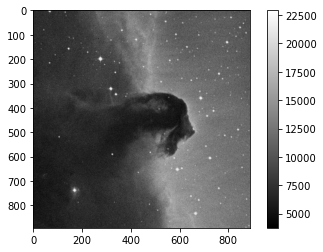

In [38]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()


If you want more practice on astropy, go to this site: https://learn.astropy.org/